# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Dermatology dataset

In [2]:
Xy = pd.read_csv('../datasets/dermatology.csv')

X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
nb_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
nb_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
nb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8513513513513513, 0.8918918918918919, 0.8108108108108109, 0.8918918918918919, 0.8783783783783784, 0.8243243243243243, 0.8513513513513513, 0.9054054054054054, 0.8513513513513513, 0.8783783783783784, 0.8918918918918919, 0.8648648648648649, 0.9054054054054054, 0.8378378378378378, 0.8648648648648649, 0.8783783783783784, 0.8648648648648649, 0.918918918918919, 0.8378378378378378, 0.8783783783783784]

Accuracy:
0.8689189189189189

Standard Deviation:
0.027727411525247554

Confusion Matrix:
    1   3  4   5   2  6
1  26   0  0   0   0  1
3   0  10  1   0   0  0
4   0   0  3   1   3  0
5   0   0  0  10   1  0
2   0   0  3   0  12  0
6   0   0  0   0   1  2
    5  2   1   3  6   4
5  10  2   0   0  0   0
2   0  6   0   0  1   3
1   0  1  22   0  0   0
3   0  0   0  13  0   0
6   0  0   0   0  3   0
4   0  1   0   0  0  12
   6   3   4   1  5  2
6  2   0   0   0  0  0
3  0  14   0   0  0  0
4  0   0  11   0  2  3
1  0   0   1  19  0  2
5 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,1,3,4,5,2,6
1,22,0,0,0,0,0
3,0,14,0,0,0,0
4,0,0,7,0,2,0
5,0,0,0,8,0,0
2,0,0,3,0,8,0
6,0,0,0,0,0,3


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.5, 0.527027027027027, 0.527027027027027, 0.5540540540540541, 0.4864864864864865, 0.44594594594594594, 0.4864864864864865, 0.44594594594594594, 0.6351351351351351, 0.4864864864864865, 0.5, 0.5, 0.5, 0.5135135135135135, 0.33783783783783783, 0.4864864864864865, 0.47297297297297297, 0.4864864864864865, 0.44594594594594594, 0.5135135135135135]

Accuracy:
0.49256756756756753

Standard Deviation:
0.05413423107825484

Confusion Matrix:
    1  3  4  5  2  6
1  17  0  0  2  4  4
3   0  6  0  0  5  0
4   2  0  1  0  3  1
5   4  0  0  5  1  1
2   7  1  0  0  5  2
6   0  0  0  0  0  3
   5  2   1   3  6  4
5  6  0   2   1  1  2
2  0  1   0   2  3  4
1  0  0  13   2  5  3
3  0  0   0  10  0  3
6  0  0   0   0  3  0
4  0  1   0   3  3  6
   6  3  4   1  5  2
6  2  0  0   0  0  0
3  1  8  0   0  0  5
4  5  2  6   1  0  2
1  2  0  0  15  3  2
5  1  3  0   3  5  0
2  0  2  2   1  0  3
   2   3   1  5  6  4
2  0   0   3  0  1  4
3  0  13   0  0  

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,1,3,4,5,2,6
1,13,0,3,0,1,3
3,0,9,2,0,1,1
4,1,1,3,0,1,2
5,2,0,1,3,0,2
2,2,1,3,0,2,2
6,0,0,0,0,0,3


# Showing naive bayes informations computed

In [8]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.8513513513513513, 0.8108108108108109, 0.8648648648648649, 0.918918918918919, 0.8108108108108109, 0.8918918918918919, 0.9324324324324325, 0.8918918918918919, 0.7837837837837838, 0.8513513513513513, 0.9324324324324325, 0.8648648648648649, 0.8648648648648649, 0.8783783783783784, 0.9054054054054054, 0.8513513513513513, 0.8918918918918919, 0.918918918918919, 0.918918918918919, 0.9054054054054054]

Accuracy:
0.8770270270270271

Standard Deviation:
0.04096623348979492

Confusion Matrix:
    1   3  4   5   2  6
1  25   0  0   0   2  0
3   0  10  0   0   1  0
4   0   0  1   0   6  0
5   0   0  0  11   0  0
2   1   0  0   0  14  0
6   0   0  1   0   0  2
    5  2   1   3  6  4
5  11  0   0   0  0  1
2   0  9   0   0  0  1
1   0  0  21   0  0  2
3   0  1   0  12  0  0
6   0  0   0   0  3  0
4   2  7   0   0  0  4
   6   3  4   1   5  2
6  2   0  0   0   0  0
3  0  13  0   0   0  1
4  0   0  9   0   0  7
1  0   0  0  21   0  1
5  0

In [9]:
confusion_matrix_mean(nb_confusion_matrix_list)

,1,3,4,5,2,6
1,22,0,0,0,0,0
3,0,14,0,0,0,0
4,0,0,4,0,5,0
5,0,0,0,9,0,0
2,0,0,0,0,11,0
6,0,0,0,0,0,3


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['erythema', 'scaling']], X_test[['erythema', 'scaling']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     erythema  scaling
228         2        1
332         2        2
46          2        1
88          0        1
257         3        2
..        ...      ...
64          2        2
195         2        2
38          2        1
184         2        2
321         2        2

[292 rows x 2 columns]
Test dataset:
     erythema  scaling
193         2        2
123         2        3
246         2        2
341         1        1
244         2        1
..        ...      ...
355         2        3
180         2        3
329         2        2
317         2        2
8           2        2

[74 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

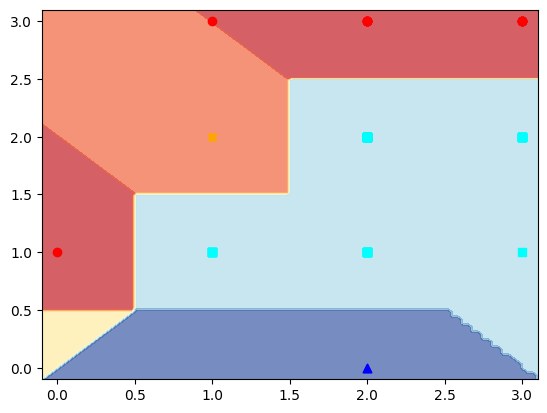

In [15]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)
four = np.where(knn_y_pred == 4)
five = np.where(knn_y_pred == 5)
six = np.where(knn_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting dmc decision surface

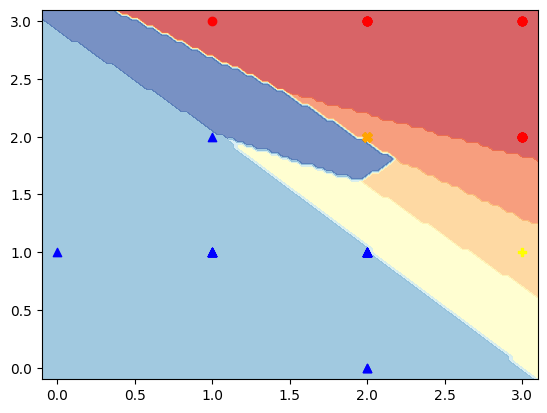

In [16]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)
four = np.where(dmc_y_pred == 4)
five = np.where(dmc_y_pred == 5)
six = np.where(dmc_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting naive bayes decision surface

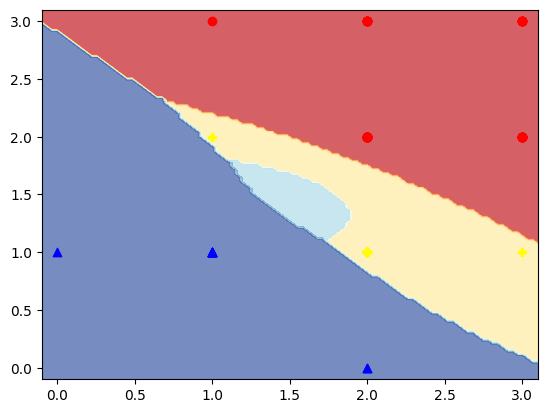

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

one = np.where(nb_y_pred == 1)
two = np.where(nb_y_pred == 2)
three = np.where(nb_y_pred == 3)
four = np.where(nb_y_pred == 4)
five = np.where(nb_y_pred == 5)
six = np.where(nb_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()